In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [114]:
data = pd.read_csv("Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [115]:
data.describe(include='all')

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [116]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [117]:
data.nunique()

number_courses      6
time_study        100
Marks             100
dtype: int64

In [118]:
correlation = data.corr()
correlation


,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


                     Correlation Matrix                     


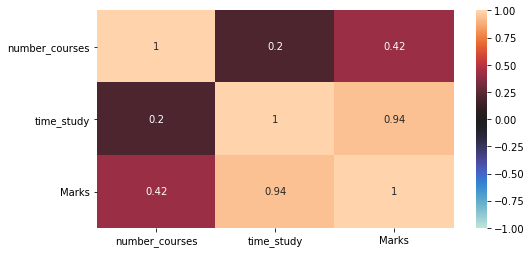

In [119]:

print('Correlation Matrix'.center(60))
plt.figure(figsize=[8,4])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [120]:
print(correlation["Marks"].sort_values(ascending=False))

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64


### time_studied column is more correlated with the marks column than the other column.

In [121]:
print(data.dtypes)

number_courses      int64
time_study        float64
Marks             float64
dtype: object


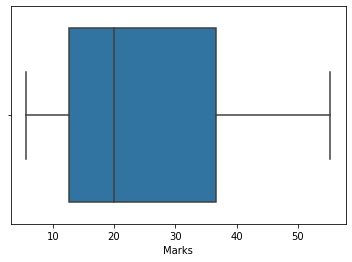

In [122]:
sns.boxplot(x=data['Marks'])

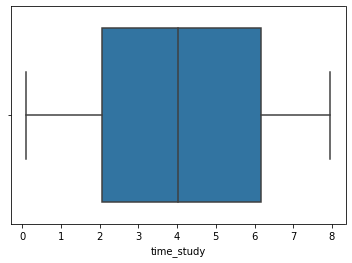

In [123]:
sns.boxplot(x=data['time_study'])



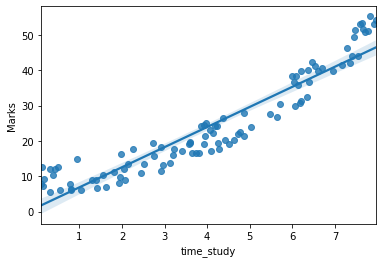

In [124]:
#Relation between marks and time spent on studying
sns.regplot(x=data['time_study'],y=data['Marks'])
plt.show()


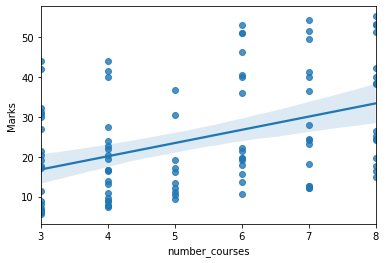

In [125]:
#Relation between marks and courses
sns.regplot(x=data['number_courses'],y=data['Marks'])
plt.show()

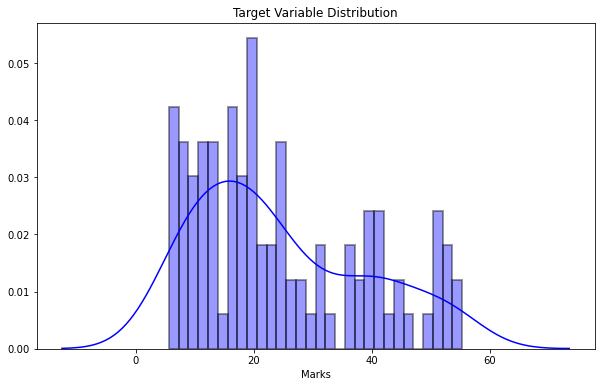

In [126]:
plt.figure(figsize=[10,6])
sns.distplot(data['Marks'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting data into features and target column 
X = data[['number_courses', 'time_study']]
y = data['Marks']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Scaling data 
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [128]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print(f"Linear model accuracy: {round(lr.score(X_test, y_test) * 100, 2)} %")



Linear model accuracy: 93.93 %


In [140]:
from sklearn.metrics import r2_score
print(f'Linear model accuracy using R² (coefficient of determination):', round(r2_score(y_test,lr_preds)*100,2) , '%')

Linear model accuracy using R² (coefficient of determination): 93.93 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(f"Random Forest model accuracy: {round(rf.score(X_test, y_test) * 100, 2)} %")


Random Forest model accuracy: 98.87 %


In [139]:
from sklearn.metrics import r2_score
print(f'Random Forest accuracy using R² (coefficient of determination):', round(r2_score(y_test,rf_preds)*100,2) , '%')

Random Forest accuracy using R² (coefficient of determination): 98.87 %


In [ ]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)
print(f"Support Vector Regression model accuracy: {round(svr.score(X_test, y_test) * 100, 2)} %")


Support Vector Regression model accuracy: 84.71 %


In [145]:
from sklearn.metrics import r2_score
print(f'Support Vector Regression accuracy using R² (coefficient of determination):', round(r2_score(y_test,svr_preds)*100,2) , '%')

Support Vector Regression accuracy using R² (coefficient of determination): 84.71 %


In [ ]:
from sklearn.metrics import mean_absolute_error
print(f"Performance of Linear Regression: MAE: {mean_absolute_error(y_test, lr_preds)}")
print(f"Performance of Random Forest Regression: MAE: {mean_absolute_error(y_test, rf_preds)}")
print(f"Performance of Support Vector Regression: MAE: {mean_absolute_error(y_test, svr_preds)}")


Performance of Linear Regression: MAE: 3.271964909729686
Performance of Random Forest Regression: MAE: 1.0837644999999976
Performance of Support Vector Regression: MAE: 3.499719754274506


Random Forest model is found to be the best with error of 1.08, which means if we predict a students marks based on it number of courses and study time we miss by maximum of 1.8 marks. 

In [154]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print(f"k-nearest neighbors model accuracy: {round(knn.score(X_test, y_test) * 100, 2)} %")


k-nearest neighbors model accuracy: 99.18 %


### It is found that the k-nearest neighbors algorithm has the more accuracy as compared to the Linear regression and Random Forest regressor

## Prediction

In [ ]:
new_student = {'num_courses': 3, 'time_study': 5.5}

In [153]:
print(f"Random Forest model predict marks of new student: {rf.predict(np.array([list(new_student.values())]))[0]} \n")
print(f"Linear model predict marks of new student: {lr.predict(np.array([list(new_student.values())]))[0]} \n")
print(f"KNN predict marks of new student: {knn.predict(np.array([list(new_student.values())]))[0]}")

Random Forest model predict marks of new student: 28.142300000000024 

Linear model predict marks of new student: 27.854088436815523 

KNN predict marks of new student: 28.049599999999998
